In [1]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from skimage.metrics import peak_signal_noise_ratio as psnr

In [2]:
image_folder = 'C:/Users/nicol/Desktop/UNI/3.Master/MasterThesis/PracticalPart/dataset_generation/DIAGRAMS/test/HR' 
img_list = os.listdir(image_folder)
rnd_img = np.random.choice(img_list)
rnd_img = Image.open(os.path.join(image_folder, rnd_img))
SCALE = 8

In [3]:
def downsample(img,scale):
    width,height = img.size
    new_size = (int(width//scale),int(height//scale))
    low_res_img = img.resize(new_size,Image.BICUBIC)
    return low_res_img

low_res_img = downsample(rnd_img,SCALE)
low_res_path = './test_img/low_res/low_res.png'
low_res_img.save(low_res_path)

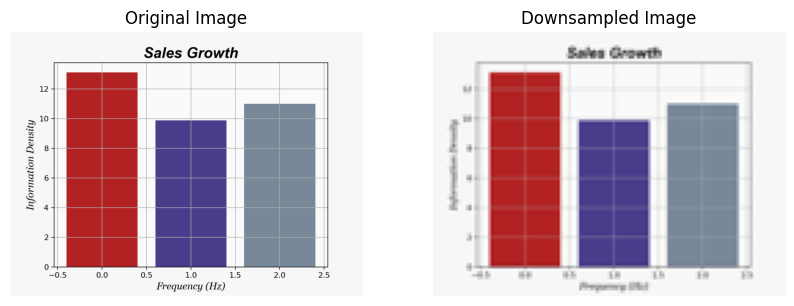

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rnd_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(low_res_img)
plt.title("Downsampled Image")
plt.axis("off")
plt.show()

In [5]:
upscaled_path = './test_img/upscaled/upscaled.png'
!python demo.py --input ./test_img/low_res/low_res.png --model save/_train_custom/epoch-best.pth --resolution {rnd_img.size[1]},{rnd_img.size[0]} --output {upscaled_path} --gpu 0

c:\Users\nicol\anaconda3\envs\cuda_env\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


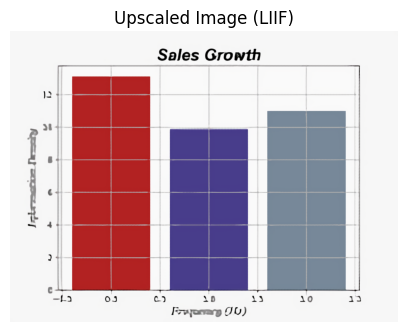

In [6]:
upscaled_image = Image.open(upscaled_path)
plt.figure(figsize=(5, 5))
plt.imshow(upscaled_image)
plt.title("Upscaled Image (LIIF)")
plt.axis("off")
plt.show()

final_sr.shape = (1024, 768)
hr image shape: (1024, 768)
lr image shape: (128, 96)
PSNR value: 22.604449990224165


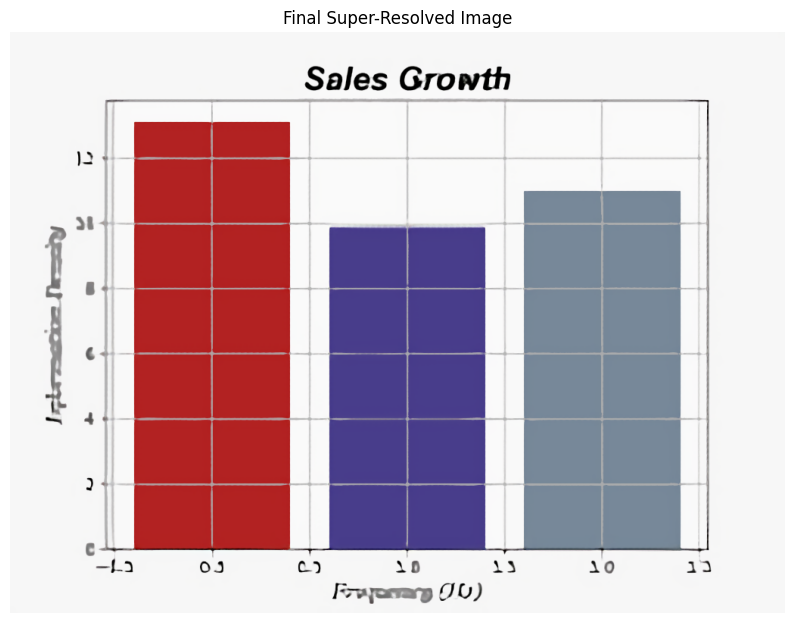

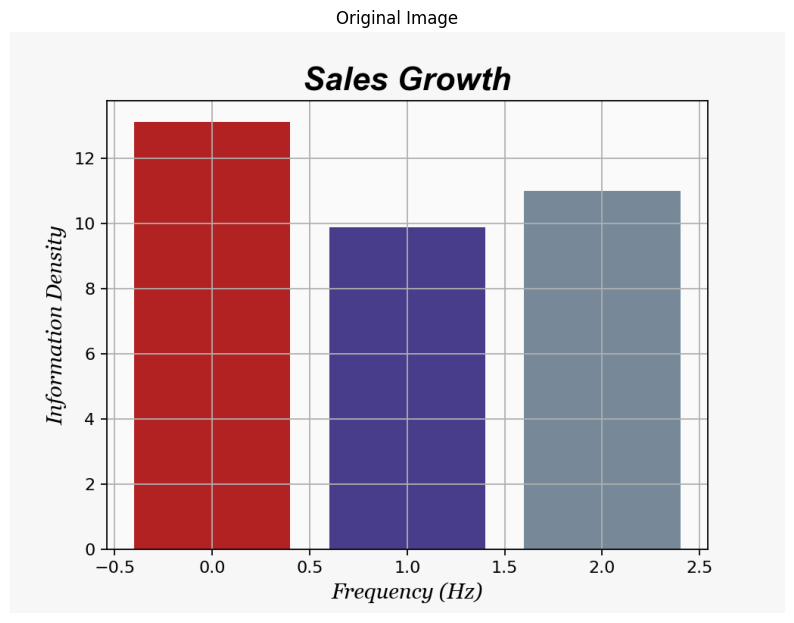

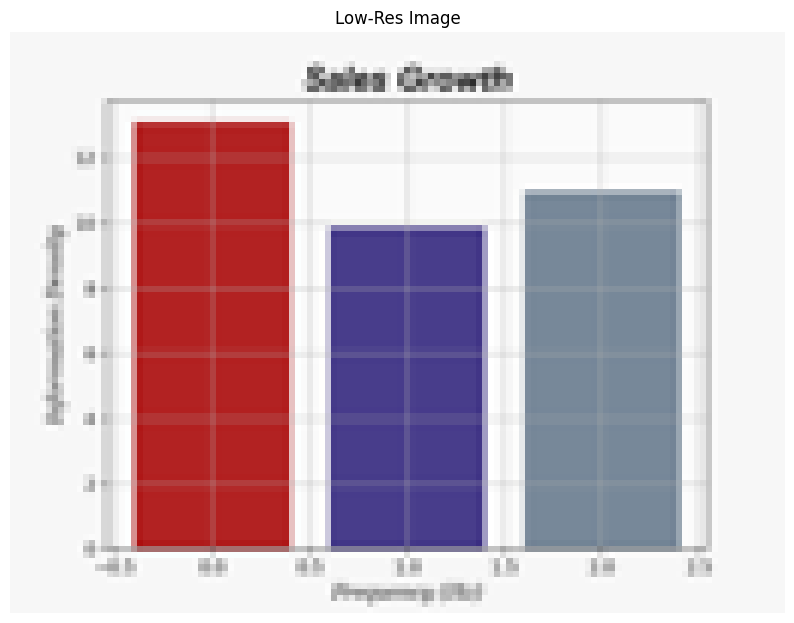

In [7]:
print("final_sr.shape =", upscaled_image.size) 
print("hr image shape:",rnd_img.size)
print("lr image shape:", low_res_img.size)
sr_np = np.array(upscaled_image)
hr_np = np.array(rnd_img)
psnr_val = psnr(sr_np, hr_np, data_range=255)
print("PSNR value:", psnr_val)
plt.figure(figsize=(10,10))
plt.imshow(upscaled_image)
plt.title("Final Super-Resolved Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(rnd_img)
plt.title("Original Image")
plt.axis("off")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(low_res_img)
plt.title("Low-Res Image")
plt.axis("off")
plt.show()